# Decision Tree Learning with Scikit-Learn

Decison tree classifiers 

Effectively break data down by making decisons based on asking a series of questions to infer class labels of samples. The sample at ech node belowng to teh same class, which in practise can lead to very deep trees with many nodes - this can led to overfitting. Normally we attempy to prune the tree by setting a limit to the maximal depth of the tree.

The key is to split the data at each node into the most informative features; to maximise teh information gained at each split. The information gained at each node split is the difference between the 'impurity' of the parent node and the sum of the impurities at each child node. The lower the impurity of the child nodes the higher the gain. Many implementations are binary, with each node being split into two child nodes.  

The impurity measures are typically __Gini__, __entropy__ and __classification error__

## Exploring the Impurity Measures

In [28]:
import matplotlib.pyplot as plt
import numpy as np

The Gini impurity tries to minimise the probablility of a miss classification.

In [29]:
def gini(p):
    return (p)*(1-(p))+ (1-p)*(1-(1-p))

Entropy tries to maximise the mutual information in the tree. It uses the proportion of samples that belong to each class fo a particular node to  - the entropy is 0 if all samples at a node belong to the same class, and the entropy is at a maximum if we have a uniform class distribution. 

In [30]:
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

The error criterion is useful for pruning a tree but not growing it as it is less sensitive to changes in the class probablitities at the nodes. 

In [31]:
def error(p):
    return 1-np.max([p, 1-p])

Entropy and Ginit give similar results in practise. Lets compare them for the probablilty range [0,1].


In [32]:
x=np.arange(0.0, 1.0, 0.01)

In [33]:
ent = [entropy(p) if p!=0 else None for p in x]

In [34]:
sc_ent = [e*0.5 if e else None for e in ent]

In [35]:
err = [error(i) for i in x]

In [36]:
fig = plt.figure()
ax=plt.subplot(111)

In [37]:
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err], 
                         ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'], 
                         ['-','-','--','-.'], 
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x,i,label=lab, linestyle=ls, lw=2, color=c)

In [38]:
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)

In [39]:
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

In [40]:
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')

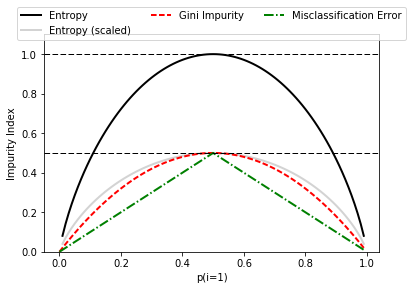

In [41]:
plt.show()

## Building the Decision Tree

Using SciKit-Learn to train a decion tree with a maximum depth of 3 using entropy as a criteria for impurity.

In [42]:
from sklearn.tree import DecisionTreeClassifier
import scikit_utilities as ut

### Get Data

You dont need to scale or standardise data for decision tree modelling.

In [43]:
X_train_std, y_train, X_test_std, y_test, X_combined_std, y_combined, X_train, X_test = ut.get_iris_data()

[0 1 2]
Training Data set is 105 values long


### Train the Model

In [44]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

### Plot  

In [45]:
X_combined = np.vstack((X_train, X_test))
Y_combined = np.hstack((y_train, y_test))

In [46]:
plt = ut.plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

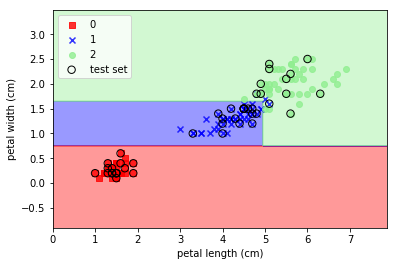

In [47]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.show()

## Optional Export of Tree graphic

Uses GraphViz to handle the exported .dot file http://www.graphviz.org


In [48]:
from sklearn.tree import export_graphviz

In [49]:
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])

Use 'dot -Tpng tree.dot -o tree.png' at the command line to convert to png to view, or just view within GraphViz.

![title](tree.png)